### Introduction to Machine Learning Pre-class assignment 1 Classification of irises

#### [Problem 1] Select features and categories for practice

In [96]:
from sklearn.datasets import load_iris
import pandas as pd 
data = load_iris()

x= pd.DataFrame(data.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(data.target,columns=["variety"])

x2 = x[["sepal_length","petal_length"]]
df = pd.concat([x2,y], axis=1)
subset = df.loc[(df['variety'] == 1) | (df['variety'] == 2)].reset_index(drop=True)
subset.head()

,sepal_length,petal_length,variety
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


#### [Problem 2] Data analysis

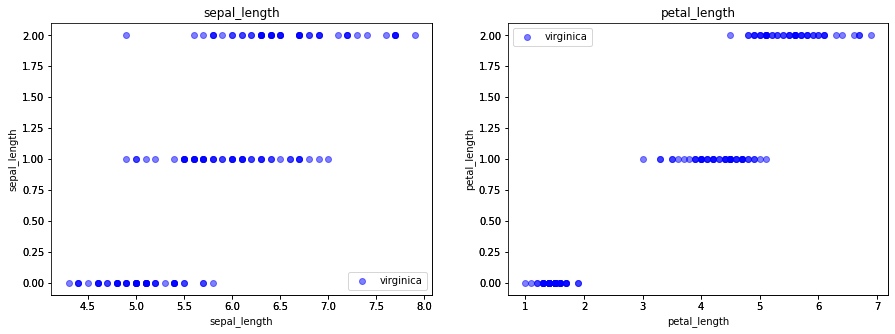

In [97]:
import numpy as np 
import matplotlib.pyplot as plt 

figure = plt.figure(figsize=(15,5))
variety_names = ['versicolor', 'virginica']
x_features = ['sepal_length', 'petal_length']
colors = ['red', 'blue']

for features in range (len(x_features)):
    for a in range(len(variety_names)):
        ax1 = figure.add_subplot(1,2,features+1)
        ax1.scatter(df[x_features[features]], df['variety'],color=colors[a], label=variety_names[a], alpha=0.5)
    ax1.legend()
    ax1.set_title(x_features[features])
    ax1.set_xlabel(x_features[features])
    ax1.set_ylabel(x_features[features])

    
# ax1 = figure.add_subplot(1,2,1)  
# ax1.scatter(df[x_features[0]], df['variety'],color=colors[0], label=variety_names[0], alpha=0.5)
# ax1.scatter(df[x_features[0]], df['variety'],color=colors[1], label=variety_names[1], alpha=0.5)

# ax1.legend()
# ax1.set_title(x_features[0])
# ax1.set_xlabel(x_features[0])
# ax1.set_ylabel('variety')



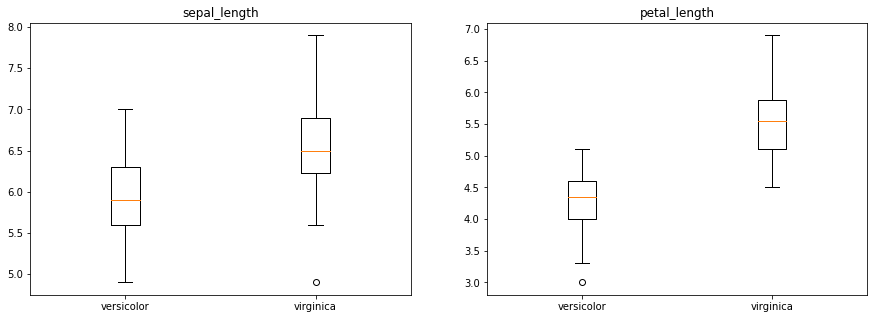

In [98]:
fig = plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1,2, feature+1)
    ax2.boxplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

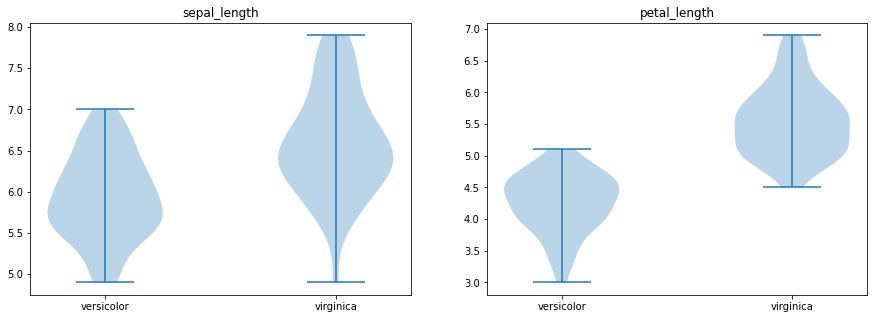

In [99]:
# violinplot

fig = plt.figure(figsize=(15,5))
import seaborn as sns
for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
    ax2 = fig.add_subplot(1,2, feature+1)
    ax2.violinplot(x)
    ax2.set_xticks([1,2])
    ax2.set_xticklabels(variety_names)
    ax2.set_title(x_features[feature])

#### [Problem 3] Division of preprocessing/training data and verification data

In [100]:
import numpy as np 
from sklearn.model_selection import train_test_split

x = np.array(subset.loc[:,["sepal_length", "petal_length"]])
y = np.array(subset["variety"])

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#### [Problem 4] Pretreatment/Standardization

In [101]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(x_train)
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

#### [Problem 5] Learning and estimation

In [102]:
from sklearn.neighbors import KNeighborsClassifier

k_neight_3 = KNeighborsClassifier(n_neighbors=3)
k_neight_3.fit(x_train_trans, y_train.ravel())
pred_3 = k_neight_3.predict(x_test_trans)
print("Pred3 = " , pred_3)

k_neight_5 = KNeighborsClassifier(n_neighbors=5)
k_neight_5.fit(x_train_trans, y_train.ravel())
pred_5 = k_neight_5.predict(x_test_trans)
print("Pred5 = " , pred_5)

k_neight_1 = KNeighborsClassifier(n_neighbors=1)
k_neight_1.fit(x_train_trans, y_train.ravel())
pred_1 = k_neight_1.predict(x_test_trans)
print("Pred1 = " , pred_1)

# k_neight_5 = KNeighborsClassifier(n_neighbors=5)
# k_neight_5.fit(x_train_trans, y_train.ravel())
# pred_5 = k_neight_3.predict(x_train_trans)
# print("Pred5 = " , pred_5)

Pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
Pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
Pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


#### [Problem 6] Evaluation

In [103]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions = [pred_3,pred_5, pred_1]
keys = ["knn3", "knn5", "knn1"]

for a,prediction in enumerate(predictions,0):
    print("predictions of ", keys[a])
    print("accuracy= ", accuracy_score(y_true=y_test, y_pred=prediction))
    print("precision= ", precision_score(y_true=y_test, y_pred=prediction,average=None))
    print("recall = ", recall_score(y_true=y_test, y_pred=prediction,average=None))
    print("f1 scrore = ", f1_score(y_true=y_test, y_pred=prediction, average=None))
    print("confusion matrix = ", confusion_matrix(y_true=y_test, y_pred=prediction))
    print("=====================================================================")

predictions of  knn3
accuracy=  0.8
precision=  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 scrore =  [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]
predictions of  knn5
accuracy=  0.8
precision=  [0.76470588 0.875     ]
recall =  [0.92857143 0.63636364]
f1 scrore =  [0.83870968 0.73684211]
confusion matrix =  [[13  1]
 [ 4  7]]
predictions of  knn1
accuracy=  0.8
precision=  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 scrore =  [0.82758621 0.76190476]
confusion matrix =  [[12  2]
 [ 3  8]]


#### [Problem 7] Visualization

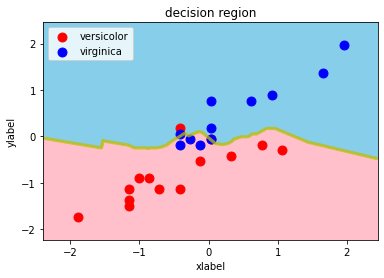

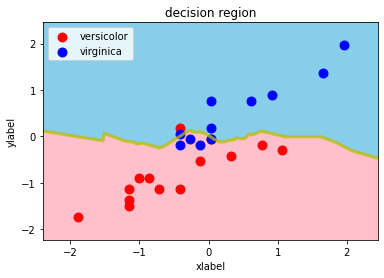

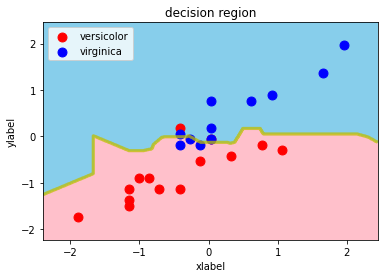

In [104]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
  
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
models = [k_neight_3,k_neight_5,k_neight_1]
for a, model in enumerate(models, 1):
    decision_region(x_test_trans, y_test, model)

#### [Problem 8] Learning by other methods

In [105]:
def display_outputs(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy = ",accuracy_score(y_true=y_test, y_pred=pred))
    print("precision = ", precision_score(y_true=y_test, y_pred=pred, average=None))
    print("recall = ", recall_score(y_true=y_test, y_pred=pred, average=None))
    print("f1 score  =", f1_score(y_true=y_test, y_pred=pred, average=None))
    if(std == True):
        decision_region(x_test_trans, y_test, model)
    else:
        decision_region(x_test_trans, y_test, model)
    print("\n=====================================================================\n")
    

Logical Regression
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.85714286 0.81818182]
recall =  [0.85714286 0.81818182]
f1 score  = [0.85714286 0.81818182]


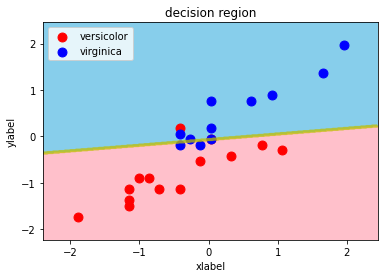



SVM
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.85714286 0.81818182]
recall =  [0.85714286 0.81818182]
f1 score  = [0.85714286 0.81818182]


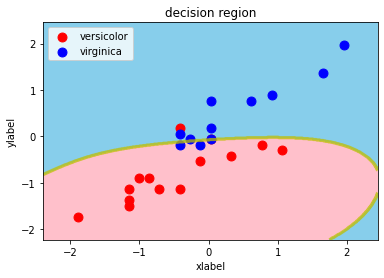



Decision Tree
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.8125     0.88888889]
recall =  [0.92857143 0.72727273]
f1 score  = [0.86666667 0.8       ]


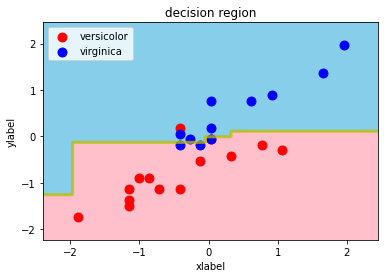



Random Forest
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.76470588 0.875     ]
recall =  [0.92857143 0.63636364]
f1 score  = [0.83870968 0.73684211]


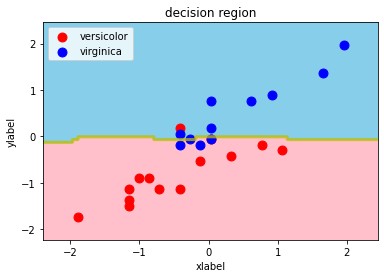

In [106]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit= LogisticRegression(random_state=0).fit(x_train_trans, y_train)
lR_predict = lR_fit.predict(x_test_trans)
display_outputs('Logical Regression', lR_predict, lR_fit, std=True)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_trans, y_train)
clf_pred= clf.predict(x_test_trans)
display_outputs('SVM', clf_pred,clf,std=True)

# Descision Tree

from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans, y_train)
dTC_pred = dTC.predict(x_test_trans)
display_outputs('Decision Tree', dTC_pred, dTC,std=True)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train_trans,y_train)
rFC_pred = rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=True)


#### [Problem 9] (Advanced task) Comparison with and without standardization

Knn
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.8 0.8]
recall =  [0.85714286 0.72727273]
f1 score  = [0.82758621 0.76190476]
ipykernel_launcher:19: UserWarning: No contour levels were found within the data range.


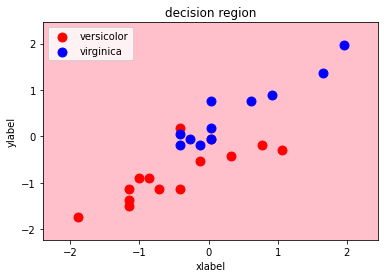



Logical Regression
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.85714286 0.81818182]
recall =  [0.85714286 0.81818182]
f1 score  = [0.85714286 0.81818182]
ipykernel_launcher:19: UserWarning: No contour levels were found within the data range.


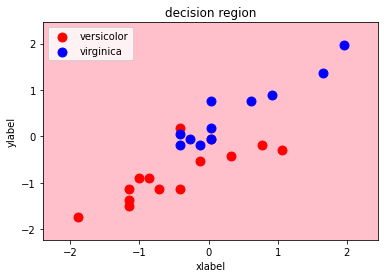



SVM
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.85714286 0.81818182]
recall =  [0.85714286 0.81818182]
f1 score  = [0.85714286 0.81818182]
ipykernel_launcher:19: UserWarning: No contour levels were found within the data range.


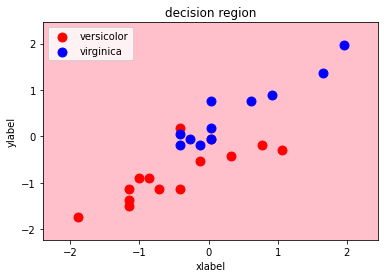



Decision Tree
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy =  0.84
precision =  [0.8125     0.88888889]
recall =  [0.92857143 0.72727273]
f1 score  = [0.86666667 0.8       ]
ipykernel_launcher:19: UserWarning: No contour levels were found within the data range.


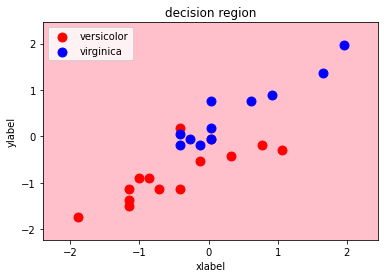



Random Forest
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy =  0.8
precision =  [0.76470588 0.875     ]
recall =  [0.92857143 0.63636364]
f1 score  = [0.83870968 0.73684211]
ipykernel_launcher:19: UserWarning: No contour levels were found within the data range.


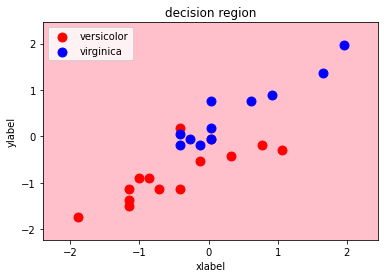

In [107]:
# Kn
k_neight_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neight_3_2.fit(x_train, y_train.ravel())
pred_3_2 = k_neight_3_2.predict(x_test)
display_outputs('Knn',pred_3_2,k_neight_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit= LogisticRegression(random_state=0).fit(x_train, y_train)
lR_predict = lR_fit.predict(x_test)
display_outputs('Logical Regression', lR_predict, lR_fit, std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
clf_pred= clf.predict(x_test)
display_outputs('SVM', clf_pred,clf,std=False)


# Descision Tree

from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train, y_train)
dTC_pred = dTC.predict(x_test)
display_outputs('Decision Tree', dTC_pred, dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train,y_train)
rFC_pred = rFC.predict(x_test)
display_outputs('Random Forest',rFC_pred,rFC,std=False)

#### [Problem 10] (Advance task) Highly accurate method using all objective variables

Knn
pred =  [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy =  0.9473684210526315
precision =  [1.         0.90909091 0.91666667]
recall =  [1.         0.90909091 0.91666667]
f1 score  = [1.         0.90909091 0.91666667]
confusion matrix =  [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


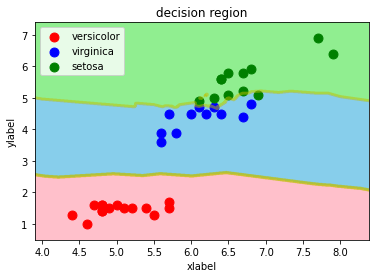



Logical Regression
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy =  1.0
precision =  [1. 1. 1.]
recall =  [1. 1. 1.]
f1 score  = [1. 1. 1.]
confusion matrix =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


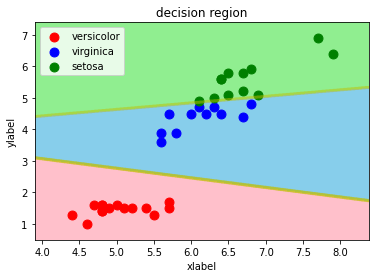



SVM
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy =  1.0
precision =  [1. 1. 1.]
recall =  [1. 1. 1.]
f1 score  = [1. 1. 1.]
confusion matrix =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


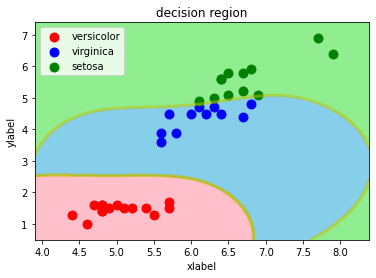



Decision Tree
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy =  1.0
precision =  [1. 1. 1.]
recall =  [1. 1. 1.]
f1 score  = [1. 1. 1.]
confusion matrix =  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


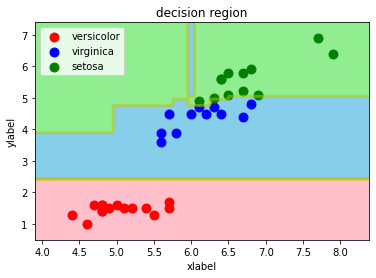



Random Forest
pred =  [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy =  0.9736842105263158
precision =  [1.         1.         0.92307692]
recall =  [1.         0.90909091 1.        ]
f1 score  = [1.         0.95238095 0.96      ]
confusion matrix =  [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


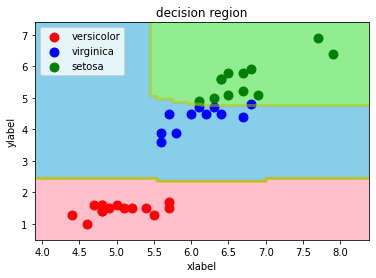

In [108]:
def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica','setosa']):
  
    # setting
    scatter_color = ['red', 'blue', 'green' ]
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def display_outputs_2(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy = ",accuracy_score(y_true=y_test, y_pred=pred))
    print("precision = ", precision_score(y_true=y_test, y_pred=pred, average=None))
    print("recall = ", recall_score(y_true=y_test, y_pred=pred, average=None))
    print("f1 score  =", f1_score(y_true=y_test, y_pred=pred, average=None))
    print("confusion matrix = ", confusion_matrix(y_true=y_test, y_pred=pred))
    if(std == True):
        decision_region_2(x_test_trans, y_test, model)
    else:
        decision_region_2(x_test, y_test, model)
    print("\n=====================================================================\n")

# All targets new variables 
x2= df.iloc[:, :-1].values
y2= df.iloc[:,-1].values

x_train,x_test,y_train, y_test = train_test_split(x2, y2, test_size=0.25, random_state=42)


# Kn
k_neight_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neight_3_2.fit(x_train, y_train.ravel())
pred_3_2 = k_neight_3_2.predict(x_test)
display_outputs_2('Knn',pred_3_2,k_neight_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit= LogisticRegression(random_state=0).fit(x_train, y_train)
lR_predict = lR_fit.predict(x_test)
display_outputs_2('Logical Regression', lR_predict, lR_fit, std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
clf_pred= clf.predict(x_test)
display_outputs_2('SVM', clf_pred,clf,std=False)


# Descision Tree

from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train, y_train)
dTC_pred = dTC.predict(x_test)
display_outputs_2('Decision Tree', dTC_pred, dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train,y_train)
rFC_pred = rFC.predict(x_test)
display_outputs_2('Random Forest',rFC_pred,rFC,std=False)
